Experiment 2
Generation of Pulse Code Modulation and its reconstruction.

In [17]:
# Libraries Required for the given experiment
import numpy as np
import matplotlib.pyplot as plt
import math as mt
import pandas as pd

In [18]:
#functions
# The purpose of this function is to 
def rounding(value):
    answer = mt.floor(value) + mt.ceil(value)
    return answer / 2

# The purpose of this function is to provide with the quantized value of the signal
def Uniform_quantizater(input, level):
    step_size = 2 * max(input) / (level-1)
    Quantized_signal = [rounding(i / step_size) * step_size for i in input]
    return Quantized_signal

# The purpose of this function is to calculate SQNR through plot
def SQNR(signal_1, signal_2):
    signal_power = np.mean(signal_1**2)
    noise_power = np.mean((signal_1 - signal_2)**2)
    return 10 * np.log10(signal_power / noise_power)

def SQNR_theo(level):
    bits = np.log2(level)
    return (6 *bits) + 1.76

def Tabular(Signal):
    solution = pd.DataFrame({'Levels':Signal})
    solution = solution.drop_duplicates().reset_index(drop=True)
    solution = solution.drop(0)
    # solution = solution.sort_values(by="Levels", ascending=False)
    return solution

def Binary(level):
    X8 = []
    for i in range(level):
        num = bin(i).lstrip('0b').zfill(3) 
        arr1 = []
        arr1 = [int(j) for j in num]   
        X8.append(arr1)
    return X8

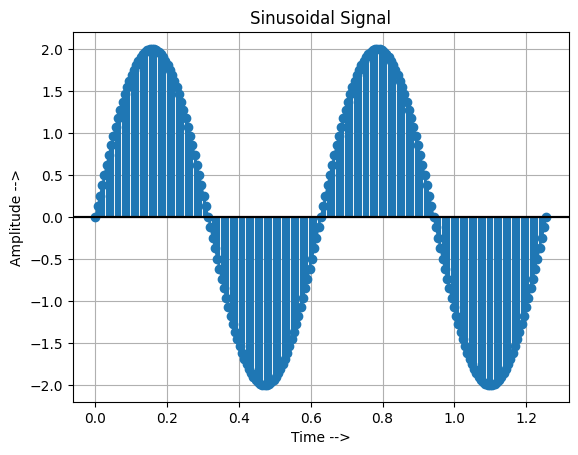

In [19]:
#Sinusoidal Signal
Amp = 2   #Amplitude of the sinusoidal signal
W_ss = 10 #Frequency of the sinusoidal signal
levels = 8
W_sampling = 1000 # According to Nyquist criteria W_samling>=2*W_ss
T_cycle = 2 *np.pi / W_ss
t_org = np.linspace(0,2 * T_cycle, 5000)
x = Amp * np.sin(W_ss * t_org)
plt.plot(t_org,x)

f_sampling = W_sampling / (2 * np.pi) 
T_sampling = 1 / f_sampling
t = np.arange(0, 200 * T_sampling, T_sampling)
#input signal
X = Amp * np.sin(W_ss * t)
plt.stem(t,X)
plt.grid()
plt.title('Sinusoidal Signal')
plt.xlabel('Time -->')
plt.ylabel('Amplitude -->')
plt.axhline(y = 0, color = 'k')
plt.axhline(y = 0, color = 'k')
plt.show()

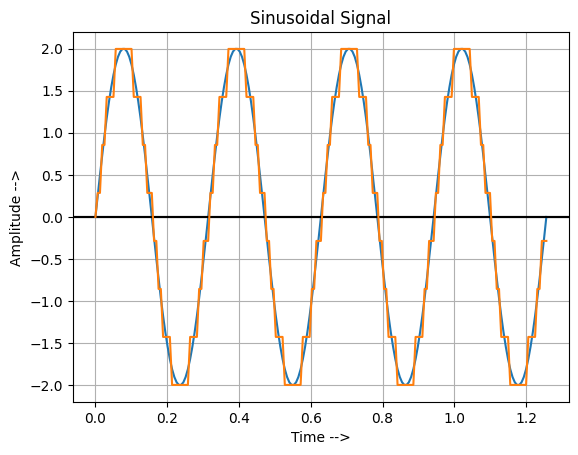

In [20]:

X = Amp * np.sin(2 * W_ss * t)
plt.plot(t,X)
plt.grid()
plt.title('Sinusoidal Signal')
plt.xlabel('Time -->')
plt.ylabel('Amplitude -->')
plt.axhline(y = 0, color = 'k')
plt.axhline(y = 0, color = 'k')
# plt.legend()

# Quantized level
Quantized_signal = Uniform_quantizater(X,8)
plt.plot(t,Quantized_signal)

In [21]:
quantized_signal = Tabular(Quantized_signal)
quantized_signal

,Levels
1,0.285150
2,0.855451
3,1.425752
4,1.996053
5,-0.285150
6,-0.855451
7,-1.425752
8,-1.996053


In [22]:
# SQNR
practical_SQNR = SQNR(X ,Quantized_signal)
print(practical_SQNR)
theoretical_SQNR = SQNR_theo(levels)
print(theoretical_SQNR)
Error = theoretical_SQNR - practical_SQNR
print(Error)
print(len(quantized_signal))

19.1287335384038
19.76
0.6312664615962014
8


In [27]:
quantization_levels = np.array([quantized_signal.Levels[i+1] for i in range(levels)])

X8 = Binary(8)
match_8 = pd.DataFrame({'quantization level 8': quantization_levels.tolist(), 'Binary Representation': np.array(X8).tolist()})
match_8

,quantization level 8,Binary Representation
0,0.285150,"[0, 0, 0]"
1,0.855451,"[0, 0, 1]"
2,1.425752,"[0, 1, 0]"
3,1.996053,"[0, 1, 1]"
4,-0.285150,"[1, 0, 0]"
5,-0.855451,"[1, 0, 1]"
6,-1.425752,"[1, 1, 0]"
7,-1.996053,"[1, 1, 1]"


<StemContainer object of 3 artists>

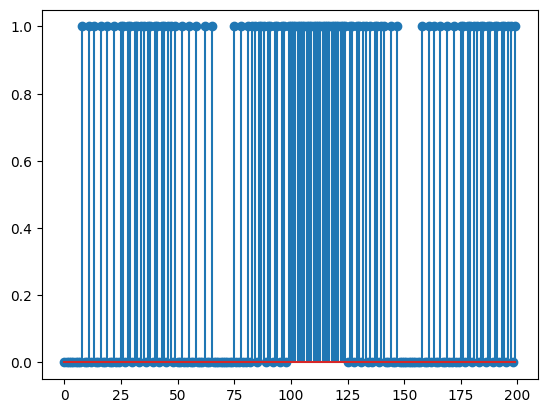

In [ ]:
pcm_8 = []
for i in Quantized_signal:
    for index, level in match_8.iterrows():
        if i == level["quantization level 8"]:
            pcm_8.extend(level["Binary Representation"])
plt.stem(pcm_8[0:200]) #We have restricted the plot inorder to view the PCM properly

In [ ]:
len(pcm_8)

600